In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('NICRH Patient Data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df

[['Case_No', 'Classification', 'Hospital_Name', 'Patient_Name', 'Age', 'Sex', 'Registration_No', 'RT_No', 'Phone_No', 'Local_Address', 'Permanent_Address', 'Occupation', 'Marital_Status', 'Socioeconomic_Condition', 'Educational_Qualification', 'Smoking_History', 'Comorbidities', 'Performance_Status', 'Body_Built', 'Diagnosis', 'Radiotherapy', 'Diagnosis_Stage', 'Stage', 'Histopathology', 'Treatment_Intention', 'Radiotherapy_Machine', 'Energy(MeV)', 'Total_Dose', 'Fractions_Number', 'Dose_Per_Fraction(Gy)', 'Weekly_Treatment_Days(Day)', 'Daily_Treatment_Duration(Min)', 'Treatment_Field', 'Superior_Border', 'Inferior_Border', 'Lateral_Border', 'Medial_Border', 'Field_Size(cm)', 'OMAS_Pretreatment', 'OMAS_After_1W', 'OMAS_After_2W', 'OMAS_After_3W', 'OMAS_After_4W', 'OMAS_After_5W', 'OMAS_After_6W', 'OMAS_After_7W', 'OMAS_2W_After_Treatment', 'OMAS_4W_After_Treatment', 'Pain_Intensity_Pretreatment', 'Pain_Intensity_After_1W', 'Pain_Intensity_After_2W', 'Pain_Intensity_After_3W', 'Pain_Int

,Case_No,Classification,Hospital_Name,Patient_Name,Age,Sex,Registration_No,RT_No,Phone_No,Local_Address,Permanent_Address,Occupation,Marital_Status,Socioeconomic_Condition,Educational_Qualification,Smoking_History,Comorbidities,Performance_Status,Body_Built,Diagnosis,Radiotherapy,Diagnosis_Stage,Stage,Histopathology,Treatment_Intention,Radiotherapy_Machine,Energy(MeV),Total_Dose,Fractions_Number,Dose_Per_Fraction(Gy),Weekly_Treatment_Days(Day),Daily_Treatment_Duration(Min),Treatment_Field,Superior_Border,Inferior_Border,Lateral_Border,Medial_Border,Field_Size(cm),OMAS_Pretreatment,OMAS_After_1W,...,WHO_Grade_After_5W,WHO_Grade_After_6W,WHO_Grade_After_7W,WHO_Grade_2W_After_Treatment,WHO_Grade_4W_After_Treatment,WHO_Grade3_Duration,Analgesic_Use_Pretreatment,Analgesic_Use_After_1W,Analgesic_Use_After_2W,Analgesic_Use_After_3W,Analgesic_Use_After_4W,Analgesic_Use_After_5W,Analgesic_Use_After_6W,Analgesic_Use_After_7W,Analgesic_Use_2W_After_Treatment,Analgesic_Use_4W_After_Treatment,Analgesic_Use,Opioid_analgesic_use,Antifungal_Use_Pretreatment,Antifungal_Use_After_1W,Antifungal_Use_After_2W,Antifungal_Use_After_3W,Antifungal_Use_After_4W,Antifungal_Use_After_5W,Antifungal_Use_After_6W,Antifungal_Use_After_7W,Antifungal_Use_2W_After_Treatment,Antifungal_Use_4W_After_Treatment,Antifungal_Use,Impact_Pretreatment,Impact_After_1W,Impact_After_2W,Impact_After_3W,Impact_After_4W,Impact_After_5W,Impact_After_6W,Impact_After_7W,Impact_2W_After_Treatment,Impact_4W_After_Treatment,Treatment_interaption
0,1,Cryotherapy along with maintaining oral hygiene,NICRH,Shahidullah,55,Male,20/21127,20/3233,1624609120,"Hatirjeel, Dhaka","Vill:Rongakhola,PO:Sahagonj, PS:Gouripur, Dist...",Farmer,Married,Average,Below SSC,Former,No,1,2,Hypopharynx,#REF!,T:2 N:1 M:X,2,Squamous cell carcinoma,Intent radical,Co60,1.25,6600,33,200,5,1.38,F\C,Mid tragus,,3 cm behind ear lobule.,,14X11,,,...,2,2,2,3,2,2,No,No,No,No,No,No,"Yes, Non","Yes, Non","Yes, Non",No,1,0,No,No,No,No,No,Yes,Yes,Yes,No,No,1,No,No,No,No,No,No,No,No,No,No,0
1,2,Cryotherapy along with maintaining oral hygiene,NICRH,Nasima,50,Female,20/15490,20/1677,1721569087,,Borguna,Others,Married,Poor,Illiterate,"Never, Smokers in family",No,2,2,Lip and Oral Cavity,Post-operative,T:4b N:1 M:X,4,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6600,33,2,5,1.33,F\C,Mid tragus,,3 cm behind ear lobule.,,11X13,,,...,1,2,2,2,1,0,No,No,No,No,No,"Yes, Non","Yes, Non","Yes, Non","Yes, Non",No,1,0,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,1,No,No,No,No,No,No,No,No,No,No,0
2,3,Cryotherapy along with maintaining oral hygiene,NICRH,Sonya,30,Female,21/578,288/21,1910043791,,"Vill:Shalla,PO: ,PS:Joydebpur ,Dist:Gazipur",Officials,Married,Average,Below SSC,"Never, Smokers in family",No,2,1,Larynx,#REF!,T: 1 N: 0 M:X,1,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6600,33,2,5,1.49,F\C,,,,,6X8,,,...,2,3,3,2,2,2,No,No,No,"Yes, Non, OP","Yes, Non, OP","Yes, Non, OP","Yes, OP","Yes, OP","Yes, Non","Yes, Non",1,1,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,1,No,No,No,No,No,No,No,No,No,No,0
3,4,Cryotherapy along with maintaining oral hygiene,NICRH,Shahin,50,Male,20/5774,103/21,1772336317,,"Vill:Sohagdal, PS:Sarupkathi, Dist:Pirojpur",Day Labourer,Married,Poor,Illiterate,Former,HTN,2,2,Larynx,#REF!,T:3 N:1 M:X,3,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6600,33,200,5,2.1,F\C,Mid tragus,,5 cm behind ear lobule.,,,,,...,2,2,2,2,1,0,No,No,No,No,No,"Yes, Non","Yes, Non","Yes, Non","Yes, Non","Yes, Non",1,0,No,No,No,No,No,Yes,Yes,Yes,Yes,No,1,No,No,No,No,No,No,No,No,No,No,0
4,9,Cryotherapy along with maintaining oral hygiene,NICRH,Kamrul,20,Male,21/7395,578/21,1641748447,"57/A, Hazipara, Rampura","Vill:Aminpur, PS:Matlab, Dist:Chandpur",Others,Unmarried,Average,HSC,Never,No,0,2,Others,#REF!,,2,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6000,30,2,5,2.44,Lt lat Face,A long the zygomatic arch,,3 cm behind ear lobule.,,,,,...,2,3,3,2,1,2,No,No,No,No,No,No,No,"Yes, Non",No,No,1,0,No,No,No,No,No,No,No,No

In [93]:
df1 = pd.read_csv('/content/drive/MyDrive/My Job/NICRH Data Collection/Analysis/NICRH Patient Data.csv')

In [94]:

df.head()

,Case_No,Classification,Hospital_Name,Patient_Name,Age,Sex,Registration_No,RT_No,Phone_No,Local_Address,Permanent_Address,Occupation,Marital_Status,Socioeconomic_Condition,Educational_Qualification,Smoking_History,Comorbidities,Performance_Status,Body_Built,Diagnosis,Radiotherapy,Diagnosis_Stage,Stage,Histopathology,Treatment_Intention,Radiotherapy_Machine,Energy(MeV),Total_Dose,Fractions_Number,Dose_Per_Fraction(Gy),Weekly_Treatment_Days(Day),Daily_Treatment_Duration(Min),Treatment_Field,Superior_Border,Inferior_Border,Lateral_Border,Medial_Border,Field_Size(cm),OMAS_Pretreatment,OMAS_After_1W,...,WHO_Grade_After_5W,WHO_Grade_After_6W,WHO_Grade_After_7W,WHO_Grade_2W_After_Treatment,WHO_Grade_4W_After_Treatment,WHO_Grade3_Duration,Analgesic_Use_Pretreatment,Analgesic_Use_After_1W,Analgesic_Use_After_2W,Analgesic_Use_After_3W,Analgesic_Use_After_4W,Analgesic_Use_After_5W,Analgesic_Use_After_6W,Analgesic_Use_After_7W,Analgesic_Use_2W_After_Treatment,Analgesic_Use_4W_After_Treatment,Analgesic_Use,Opioid_analgesic_use,Antifungal_Use_Pretreatment,Antifungal_Use_After_1W,Antifungal_Use_After_2W,Antifungal_Use_After_3W,Antifungal_Use_After_4W,Antifungal_Use_After_5W,Antifungal_Use_After_6W,Antifungal_Use_After_7W,Antifungal_Use_2W_After_Treatment,Antifungal_Use_4W_After_Treatment,Antifungal_Use,Impact_Pretreatment,Impact_After_1W,Impact_After_2W,Impact_After_3W,Impact_After_4W,Impact_After_5W,Impact_After_6W,Impact_After_7W,Impact_2W_After_Treatment,Impact_4W_After_Treatment,Treatment_interaption
0,1,Cryotherapy along with maintaining oral hygiene,NICRH,Shahidullah,55,Male,20/21127,20/3233,1624609120,"Hatirjeel, Dhaka","Vill:Rongakhola,PO:Sahagonj, PS:Gouripur, Dist...",Farmer,Married,Average,Below SSC,Former,No,1,2,Hypopharynx,#REF!,T:2 N:1 M:X,2,Squamous cell carcinoma,Intent radical,Co60,1.25,6600,33,200,5,1.38,F\C,Mid tragus,,3 cm behind ear lobule.,,14X11,,,...,2,2,2,3,2,2,No,No,No,No,No,No,"Yes, Non","Yes, Non","Yes, Non",No,1,0,No,No,No,No,No,Yes,Yes,Yes,No,No,1,No,No,No,No,No,No,No,No,No,No,0
1,2,Cryotherapy along with maintaining oral hygiene,NICRH,Nasima,50,Female,20/15490,20/1677,1721569087,,Borguna,Others,Married,Poor,Illiterate,"Never, Smokers in family",No,2,2,Lip and Oral Cavity,Post-operative,T:4b N:1 M:X,4,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6600,33,2,5,1.33,F\C,Mid tragus,,3 cm behind ear lobule.,,11X13,,,...,1,2,2,2,1,0,No,No,No,No,No,"Yes, Non","Yes, Non","Yes, Non","Yes, Non",No,1,0,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,1,No,No,No,No,No,No,No,No,No,No,0
2,3,Cryotherapy along with maintaining oral hygiene,NICRH,Sonya,30,Female,21/578,288/21,1910043791,,"Vill:Shalla,PO: ,PS:Joydebpur ,Dist:Gazipur",Officials,Married,Average,Below SSC,"Never, Smokers in family",No,2,1,Larynx,#REF!,T: 1 N: 0 M:X,1,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6600,33,2,5,1.49,F\C,,,,,6X8,,,...,2,3,3,2,2,2,No,No,No,"Yes, Non, OP","Yes, Non, OP","Yes, Non, OP","Yes, OP","Yes, OP","Yes, Non","Yes, Non",1,1,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,1,No,No,No,No,No,No,No,No,No,No,0
3,4,Cryotherapy along with maintaining oral hygiene,NICRH,Shahin,50,Male,20/5774,103/21,1772336317,,"Vill:Sohagdal, PS:Sarupkathi, Dist:Pirojpur",Day Labourer,Married,Poor,Illiterate,Former,HTN,2,2,Larynx,#REF!,T:3 N:1 M:X,3,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6600,33,200,5,2.1,F\C,Mid tragus,,5 cm behind ear lobule.,,,,,...,2,2,2,2,1,0,No,No,No,No,No,"Yes, Non","Yes, Non","Yes, Non","Yes, Non","Yes, Non",1,0,No,No,No,No,No,Yes,Yes,Yes,Yes,No,1,No,No,No,No,No,No,No,No,No,No,0
4,9,Cryotherapy along with maintaining oral hygiene,NICRH,Kamrul,20,Male,21/7395,578/21,1641748447,"57/A, Hazipara, Rampura","Vill:Aminpur, PS:Matlab, Dist:Chandpur",Others,Unmarried,Average,HSC,Never,No,0,2,Others,#REF!,,2,Squamous cell carcinoma,Intent radical,Co60(Phoneix),1.25,6000,30,2,5,2.44,Lt lat Face,A long the zygomatic arch,,3 cm behind ear lobule.,,,,,...,2,3,3,2,1,2,No,No,No,No,No,No,No,"Yes, Non",No,No,1,0,No,No,No,No,No,No,No,No

# Age

In [95]:
pd.crosstab(df.Age, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Age,,
20,2,0
30,2,0
32,0,2
41,2,0
45,2,4
50,8,6
54,2,4
55,6,6
58,0,2


In [96]:

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df['Age'], ['Classification'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.044
Probably different distributions


In [97]:
pd.pivot_table(df1, index=['Classification'], values=['Age'], aggfunc=['mean', 'median','std'])

,mean,median,std
,Age,Age,Age
Classification,,,
Cryotherapy along with maintaining oral hygiene,57.28,60,14.820064
Maintaining oral hygiene only,56.92,59,8.339334


# Sex

In [98]:
df.Sex.unique()

array(['Male', 'Female'], dtype=object)

In [99]:
contingency_data = pd.crosstab(df['Sex'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Sex,,
Female,8,14
Male,42,36


In [100]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=1.457, p=0.227
Variables are Independent / H0 Accepted


# Socioeconomic status

In [101]:
df.Socioeconomic_Condition.unique()

array(['Average', 'Poor'], dtype=object)

In [102]:
contingency_data = pd.crosstab(df['Socioeconomic_Condition'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Socioeconomic_Condition,,
Average,44,48
Poor,6,2


In [103]:
pd.crosstab(df['Classification'],df['Socioeconomic_Condition']).apply(lambda r: r/r.sum(), axis=1)*100

Socioeconomic_Condition,Average,Poor
Classification,,
Cryotherapy along with maintaining oral hygiene,88.0,12.0
Maintaining oral hygiene only,96.0,4.0


In [104]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=1.223, p=0.269
Variables are Independent / H0 Accepted


# Educational Qualification

In [105]:
df.Educational_Qualification.unique()

array(['Below SSC', 'Illiterate', 'HSC', 'SSC'], dtype=object)

In [106]:

contingency_data = pd.crosstab(df['Educational_Qualification'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Educational_Qualification,,
Below SSC,16,30
HSC,2,2
Illiterate,28,14
SSC,4,4


In [107]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=8.928, p=0.030
Variables are Dependent / H0 Rejected


# Smoking History

In [108]:
df.Smoking_History.unique()

array(['Former', 'Never, Smokers in family', 'Never', 'Smokers in Family'],
      dtype=object)

In [109]:
contingency_data = pd.crosstab(df['Smoking_History'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Smoking_History,,
Former,40,38
Never,2,4
"Never, Smokers in family",4,2
Smokers in Family,4,6


In [110]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=1.785, p=0.618
Variables are Independent / H0 Accepted


# Comorbidities

In [111]:
df.Comorbidities.unique()

array(['No', 'HTN', 'COPD', 'Diabetes, HTN', 'Diabetes',
       'Lip and oral Cavity'], dtype=object)

In [112]:
contingency_data = pd.crosstab(df['Comorbidities'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Comorbidities,,
COPD,2,0
Diabetes,4,6
"Diabetes, HTN",2,14
HTN,8,8
Lip and oral Cavity,0,2
No,34,20


In [113]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=17.030, p=0.004
Variables are Dependent / H0 Rejected


# Performance Status

In [114]:
df.Performance_Status.unique()

array(['1', '2', '0', '3', '4'], dtype=object)

In [115]:
contingency_data = pd.crosstab(df['Performance_Status'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Performance_Status,,
0,2,2
1,18,10
2,26,32
3,4,4
4,0,2


In [116]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=4.906, p=0.297
Variables are Independent / H0 Accepted


# Diagnosis

In [117]:
df.Diagnosis.unique()

array(['Hypopharynx', 'Lip and Oral Cavity', 'Larynx', 'Others',
       'Oropharynx', 'Nasopharynx', 'Nasal Cavity paranasal sinus'],
      dtype=object)

In [118]:
df.Diagnosis.isnull().any()

False

In [119]:
contingency_data = pd.crosstab(df['Diagnosis'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Diagnosis,,
Hypopharynx,7,4
Larynx,20,14
Lip and Oral Cavity,6,16
Nasal Cavity paranasal sinus,0,2
Nasopharynx,2,0
Oropharynx,11,10
Others,4,4


In [120]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=10.470, p=0.106
Variables are Independent / H0 Accepted


# Diagnosis Stage

In [121]:
df.Stage.unique()

array(['2', '4', '1', '3'], dtype=object)

In [122]:
contingency_data = pd.crosstab(df['Stage'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Stage,,
1,2,2
2,17,9
3,25,31
4,6,8


In [123]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=3.390, p=0.335
Variables are Independent / H0 Accepted


# Histopathology

In [124]:
df.Histopathology.unique()

array(['Squamous cell carcinoma', 'Others'], dtype=object)

In [125]:
df.Histopathology.isnull().any()

False

In [126]:
contingency_data = pd.crosstab(df['Histopathology'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Histopathology,,
Others,4,2
Squamous cell carcinoma,46,48


In [127]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=0.177, p=0.674
Variables are Independent / H0 Accepted


# Radiotherapy

In [128]:
df.Radiotherapy.unique()

array(['#REF!', 'Post-operative'], dtype=object)

In [129]:
df.Histopathology.isnull().any()

False

In [130]:
contingency_data = pd.crosstab(df['Radiotherapy'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Radiotherapy,,
#REF!,44,34
Post-operative,6,16


In [131]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=4.720, p=0.030
Variables are Dependent / H0 Rejected


# Total_Dose

In [132]:
df.Total_Dose.unique()

array(['6600', '6000', '3000'], dtype=object)

In [133]:
df.Total_Dose.isnull().any()

False

In [134]:
contingency_data = pd.crosstab(df['Total_Dose'], df['Classification'])
contingency_data 

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
Total_Dose,,
3000,0,4
6000,6,10
6600,44,36


In [135]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Variables are Dependent / H0 Rejected')    
else:
    print('Variables are Independent / H0 Accepted')

stat=5.800, p=0.055
Variables are Independent / H0 Accepted


# RT field

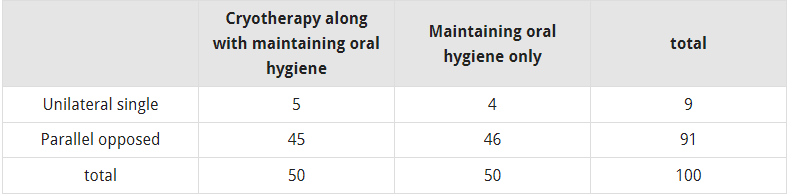

---


In [136]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 5, 4
Parallel_Cryotherapy, Parallel_Maintaining = 45, 46

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 1.0000


# Comparison of WHO mucositis grade in 1st week of radiotherapy

In [137]:
pd.crosstab(df.WHO_Grade_After_1W, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_After_1W,,
0,46,8
1,4,42


# Comparison of WHO mucositis grade in 2nd week of radiotherapy

In [138]:
pd.crosstab(df.WHO_Grade_After_2W, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_After_2W,,
0,23,1
1,27,38
2,0,11


# Comparison of WHO mucositis grade in 3rd week of radiotherapy

In [139]:
pd.crosstab(df.WHO_Grade_After_3W, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_After_3W,,
0,8,0
1,37,10
2,5,31
3,0,9


In [140]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 50, 41
Parallel_Cryotherapy, Parallel_Maintaining = 0, 9

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0026


# Comparison of WHO mucositis grade in 4th week of radiotherapy

In [141]:
pd.crosstab(df.WHO_Grade_After_4W, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_After_4W,,
1,37,1
2,13,34
3,0,15


In [142]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 50, 35
Parallel_Cryotherapy, Parallel_Maintaining = 0, 15

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))
pvalue

Fisher exact test p-value: 0.0000


1.776934678042208e-05

# Comparison of WHO mucositis grade in 5th week of radiotherapy

In [143]:
pd.crosstab(df.WHO_Grade_After_5W, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_After_5W,,
1,25,0
2,25,11
3,0,39


In [144]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 50, 11
Parallel_Cryotherapy, Parallel_Maintaining = 0, 39

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0000


# Comparison of WHO mucositis grade in 6th week of radiotherapy

In [145]:
pd.crosstab(df.WHO_Grade_After_6W, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_After_6W,,
1,7,0
2,37,4
3,6,46


In [146]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 44, 4
Parallel_Cryotherapy, Parallel_Maintaining = 6, 46

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0000


# Comparison of WHO mucositis grade in first follow-up 14 days after radiotherapy

In [147]:
pd.crosstab(df.WHO_Grade_2W_After_Treatment, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_2W_After_Treatment,,
1,11,0
2,33,8
3,6,21
4,0,21


In [148]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 44, 8
Parallel_Cryotherapy, Parallel_Maintaining = 6, 42

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0000


# Comparison of WHO mucositis grade in first follow-up 28 days after radiotherapy

In [149]:
pd.crosstab(df.WHO_Grade_4W_After_Treatment, df.Classification)

Classification,Cryotherapy along with maintaining oral hygiene,Maintaining oral hygiene only
WHO_Grade_4W_After_Treatment,,
1,40,6
2,10,15
3,0,29


In [150]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 50, 21
Parallel_Cryotherapy, Parallel_Maintaining = 0, 29

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0000


In [151]:
df.Age.describe()

count     100
unique     20
top        60
freq       18
Name: Age, dtype: object

# Comparison of pain intensity

Week – 1

In [152]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_After_1W'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification          Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_After_1W                                            0.04  ...                             1

[1 rows x 12 columns]

In [153]:
from scipy.stats import ttest_1samp
Pain_Intensity_After_1W	 = df1['Pain_Intensity_After_1W']
Pain_Intensity_After_1W_mean = np.mean(Pain_Intensity_After_1W)
print(Pain_Intensity_After_1W_mean)
tset, pval = ttest_1samp(Pain_Intensity_After_1W, 1)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.44
p-values 5.926623382744107e-15
 we are rejecting null hypothesis


Week – 2

In [154]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_After_2W'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification          Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_After_2W                                            0.16  ...                             1

[1 rows x 12 columns]

In [155]:
from scipy.stats import ttest_1samp
Pain_Intensity_After_2W	 = df1['Pain_Intensity_After_2W']
Pain_Intensity_After_2W_mean = np.mean(Pain_Intensity_After_2W)
print(Pain_Intensity_After_2W_mean)
tset, pval = ttest_1samp(Pain_Intensity_After_2W, 1)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

1.0
p-values 1.0
we are accepting null hypothesis


Week – 3

In [156]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_After_3W'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification          Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_After_3W                                            0.76  ...                             1

[1 rows x 12 columns]

In [157]:
from scipy.stats import ttest_1samp
Pain_Intensity_After_3W	 = df1['Pain_Intensity_After_3W']
Pain_Intensity_After_3W_mean = np.mean(Pain_Intensity_After_3W)
print(Pain_Intensity_After_3W_mean)
tset, pval = ttest_1samp(Pain_Intensity_After_3W, 2)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

1.72
p-values 0.03003066144717237
 we are rejecting null hypothesis


Week – 4

In [158]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_After_4W'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification          Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_After_4W                                            1.08  ...                             1

[1 rows x 12 columns]

In [159]:
from scipy.stats import ttest_1samp
Pain_Intensity_After_4W	 = df1['Pain_Intensity_After_4W']
Pain_Intensity_After_4W_mean = np.mean(Pain_Intensity_After_4W)
print(Pain_Intensity_After_4W_mean)
tset, pval = ttest_1samp(Pain_Intensity_After_4W, 3)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

2.28
p-values 1.3302994229915723e-05
 we are rejecting null hypothesis


Week – 5

In [160]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_After_5W'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification          Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_After_5W                                            1.56  ...                             1

[1 rows x 12 columns]

In [161]:
from scipy.stats import ttest_1samp
Pain_Intensity_After_5W	 = df1['Pain_Intensity_After_5W']
Pain_Intensity_After_5W_mean = np.mean(Pain_Intensity_After_5W)
print(Pain_Intensity_After_5W_mean)
tset, pval = ttest_1samp(Pain_Intensity_After_5W, 3)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

2.92
p-values 0.6569905055563481
we are accepting null hypothesis


Week – 6

In [162]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_After_6W'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification          Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_After_6W                                            2.04  ...                             2

[1 rows x 12 columns]

In [163]:
from scipy.stats import ttest_1samp
Pain_Intensity_After_6W	 = df1['Pain_Intensity_After_6W']
Pain_Intensity_After_6W_mean = np.mean(Pain_Intensity_After_6W)
print(Pain_Intensity_After_6W_mean)
tset, pval = ttest_1samp(Pain_Intensity_After_6W, 4)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

3.56
p-values 0.03108051829598951
 we are rejecting null hypothesis


2 Weeks after radiotherapy

In [164]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_2W_After_Treatment'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification                    Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_2W_After_Treatment                                             2.0  ...                             2

[1 rows x 12 columns]

In [165]:
from scipy.stats import ttest_1samp
Pain_Intensity_2W_After_Treatment	 = df1['Pain_Intensity_2W_After_Treatment']
Pain_Intensity_2W_After_Treatment_mean = np.mean(Pain_Intensity_2W_After_Treatment)
print(Pain_Intensity_2W_After_Treatment_mean)
tset, pval = ttest_1samp(Pain_Intensity_2W_After_Treatment, 4)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

3.98
p-values 0.9348687884836742
we are accepting null hypothesis


4 weeks after radiotherapy

In [166]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

df1.pivot_table(columns = ['Classification'], values = ['Pain_Intensity_4W_After_Treatment'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])

mean  ...                           iqr
Classification                    Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
Pain_Intensity_4W_After_Treatment                                            1.28  ...                             2

[1 rows x 12 columns]

In [167]:
from scipy.stats import ttest_1samp
Pain_Intensity_4W_After_Treatment	 = df1['Pain_Intensity_4W_After_Treatment']
Pain_Intensity_4W_After_Treatment_mean = np.mean(Pain_Intensity_4W_After_Treatment)
print(Pain_Intensity_4W_After_Treatment_mean)
tset, pval = ttest_1samp(Pain_Intensity_4W_After_Treatment, 4)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

3.24
p-values 0.0018440439669650502
 we are rejecting null hypothesis


# Comparison of duration of WHO Gr-3 

In [168]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)
    
def iqr(g):
    return np.percentile(g, 75)-np.percentile(g, 25)

a = df1.pivot_table(columns = ['Classification'], values = ['WHO_Grade3_Duration'], 
               aggfunc = [np.mean, np.median, np.std, my75, my25, iqr])
a*7

mean  ...                           iqr
Classification      Cryotherapy along with maintaining oral hygiene  ... Maintaining oral hygiene only
WHO_Grade3_Duration                                            5.04  ...                            14

[1 rows x 12 columns]

In [169]:
from scipy.stats import ttest_1samp
WHO_Grade3_Duration	 = df1['WHO_Grade3_Duration']
WHO_Grade3_Duration_mean = np.mean(WHO_Grade3_Duration)
print(WHO_Grade3_Duration_mean)
tset, pval = ttest_1samp(WHO_Grade3_Duration, 3)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

tset

2.74
p-values 0.2808721993408512
we are accepting null hypothesis


-1.0842844769372697

In [170]:
from scipy.stats import fisher_exact

Unilateral_Cryotherapy, Unilateral_Maintaining = 50, 50
Parallel_Cryotherapy, Parallel_Maintaining = 0, 0

oddsratio, pvalue = fisher_exact([[Unilateral_Cryotherapy, Unilateral_Maintaining], [Parallel_Cryotherapy, Parallel_Maintaining]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 1.0000


#Use of analgesic


In [171]:
from scipy.stats import ttest_1samp
Analgesic_Use	 = df1['Analgesic_Use']
Analgesic_Use_mean = np.mean(Analgesic_Use)
print(Analgesic_Use_mean)
tset, pval = ttest_1samp(Analgesic_Use, 1)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

tset

0.98
p-values 0.15833990565972533
we are accepting null hypothesis


-1.4214106244380298

#Use of opioid analgesics

In [174]:
from scipy.stats import ttest_1samp
Opioid_analgesic_use	 = df1['Opioid_analgesic_use']
Opioid_analgesic_use_mean = np.mean(Opioid_analgesic_use)
print(Opioid_analgesic_use_mean)
tset, pval = ttest_1samp(Opioid_analgesic_use, 1)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

tset

0.24
p-values 1.9130564588604125e-32
 we are rejecting null hypothesis


-17.70593120962577

#Use of antifungal

In [175]:
from scipy.stats import ttest_1samp
Antifungal_Use	 = df1['Antifungal_Use']
Antifungal_Use_mean = np.mean(Antifungal_Use)
print(Antifungal_Use_mean)
tset, pval = ttest_1samp(Antifungal_Use, 1)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

tset

0.96
p-values 0.04493472521263028
 we are rejecting null hypothesis


-2.0310096011589915


#Treatment interruption

In [180]:
from scipy.stats import ttest_1samp
Treatment_interaption	 = df1['Treatment_interaption']
Treatment_interaption_mean = np.mean(Treatment_interaption)
print(Treatment_interaption_mean)
tset, pval = ttest_1samp(Treatment_interaption, 1)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

tset

0.08
p-values 4.204487799548898e-56
 we are rejecting null hypothesis


-33.741665637605976